# Intro to ssvepy

In this file, we'll examine the example dataset that ships with ssvepy.

In [1]:
import mne
import ssvepy
# get an example data set:
from ssvepy.exampledata import epoch_example


20 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Reading /Users/jan/Dropbox/Documents/side-projects/ssvepy/ssvepy/exampledata/example-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...   15996.09 ms (None)
        0 CTF compensation matrices available
16 matching events found
Applying baseline correction (mode: mean)
16 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


This is a file that's already pre-processed and epoched. You can check it's details like this:

In [2]:
epoch_example

<EpochsFIF  |  n_events : 16 (all good), tmin : 0.0 (s), tmax : 15.99609375 (s), baseline : (0.0, 0.0), ~32.1 MB, data loaded,
 '101': 1, '103': 1, '104': 1, '108': 1, '109': 1, '110': 1, '115': 1, '116': 1, '202': 1, '205': 1, '206': 1, '207': 1, '211': 1, '212': 1, '213': 1, '214': 1>

In this data, the subject was stimulated at 6 Hz. We can create an SSVEP analysis structure like this:

In [3]:
ssvep_example = ssvepy.Ssvep(epoch_example, 6.0, fmin=2, fmax=30)

You can then check, for example, what the power at the stimulation frequency was (averaged over all electrodes):

In [4]:
ssvep_example.stimulation.power.mean()

1.6633987290435648e-09

We can also check all the harmonic frequencies that have been examined. First, let's check which harmonics were examined by default (since we didn't provide any):

In [5]:
ssvep_example.harmonic.frequencies

array([[ 12.,  18.,  24.,  30.]])

You can check what order of harmonic these frequencies are:

In [6]:
ssvep_example.harmonic.orders

array([2, 3, 4, 5])

The numpy array that holds these frequencies has the following shape:

In [7]:
ssvep_example.harmonic.power.shape

(16, 64, 4)

The last dimension here is the frequency dimension. We can therefore work out the average power at the four harmonic frequencies:

In [8]:
ssvep_example.harmonic.power.mean(axis=(0, 1))

array([  7.32671447e-10,   2.48359140e-10,   1.20176901e-10,
         7.01583927e-11])

As well as the signal-to-noise ratio at those four frequencies:

In [9]:
ssvep_example.harmonic.snr.mean(axis=(0, 1))

array([ 1.68739754,  1.23014751,  1.07890902,  0.94730138])

As you can see, the signal to noise ratio decreases with each harmonic, with the fourth harmonic (24 Hz) already having almost no signal.

The calculation for this SNR is by default done by dividing the average power at a given frequency and dividing it by the average power in a 1 Hz band around it. You can set the width of this _noise_ band yourself when you create the `Ssvep` class.

---

## Plotting

We can easily visualise both the power spectrum and the SNR spectrum:

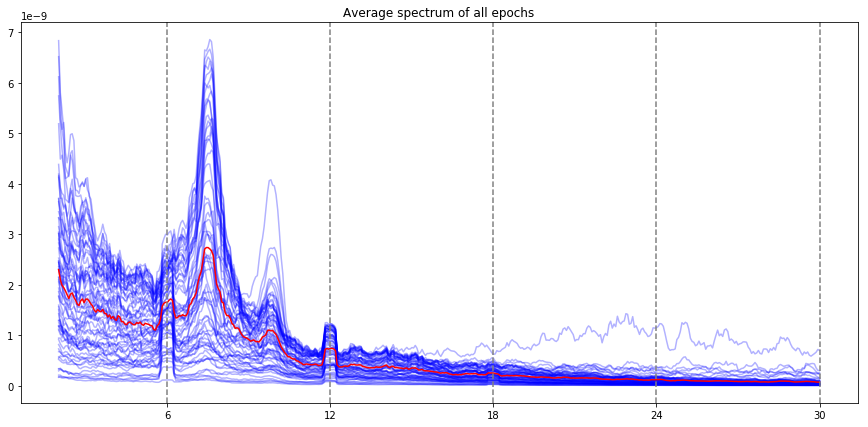

In [10]:
ssvep_example.plot_psd()

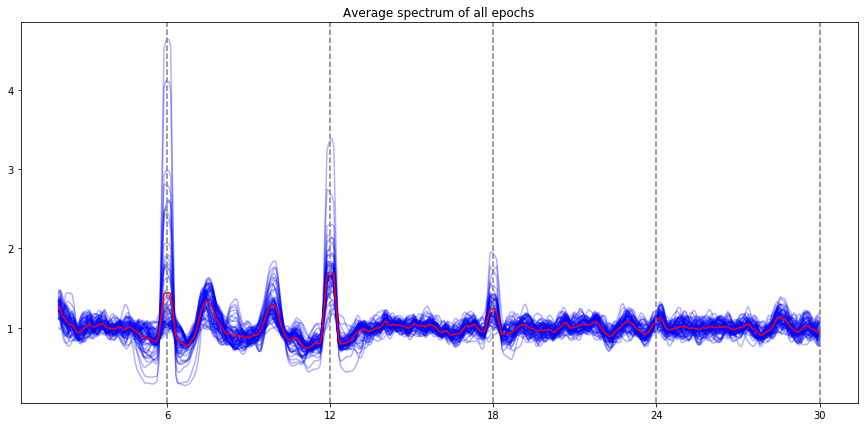

In [11]:
ssvep_example.plot_snr()

Note: the red line is the average of all electrodes, the blue lines are individual electrode. By default, all the frequencies you specified are indicated by vertical lines (the stimulation frequency, and the harmonics / subharmonics.

We can also visualise this on a scalp plot. This usually requires you to have set the montage of the raw / epoched data before you create the ssvep analysis data structure:

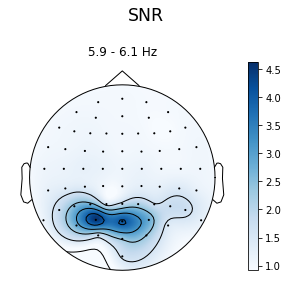

In [12]:
ssvep_example.topoplot_snr()

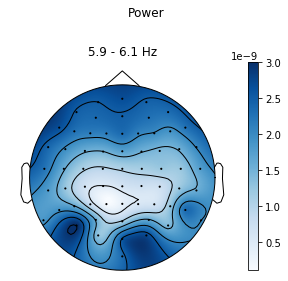

In [13]:
ssvep_example.topoplot_psd()

Just to compare, we can also plot the signal-to-noise-ratio for a random frequency using the `flims` parameter. To compare it to the SNR plot above we can set the `vmax` to something in line with the previous plot:

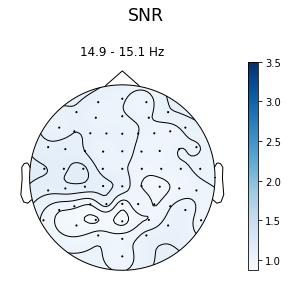

In [15]:
ssvep_example.topoplot_snr(flims=15, vmax=3.5)

And again, you can plot these for the non-linear products of the stimulation frequency:

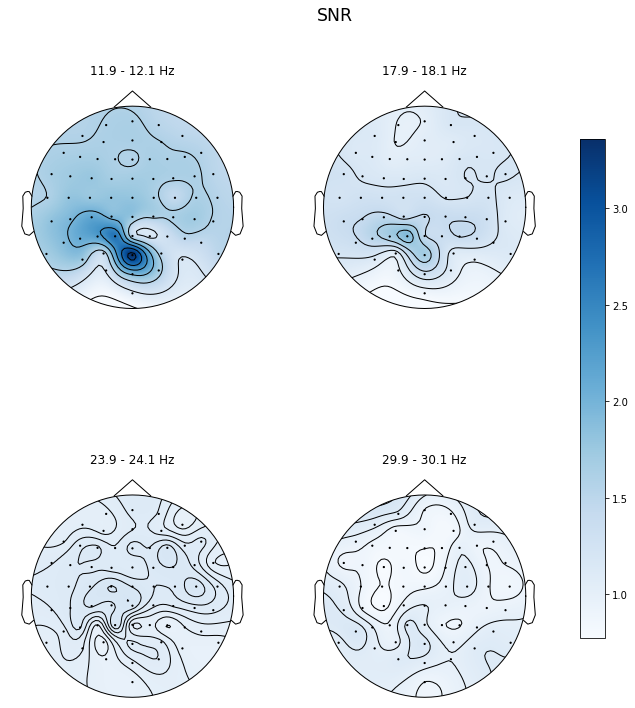

In [16]:
ssvep_example.topoplot_snr(flims='harmonic', figsize=(12, 12))